In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,NaN,2.031000,2.26460,NaN,NaN,NaN,0.74027,2.49540,NaN,1.622500,NaN
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	79
float64		column 2	78
float64		column 3	52
float64		column 4	66
float64		column 5	65
float64		column 6	52
float64		column 7	105
float64		column 8	53
float64		column 9	92
float64		column 10	78
float64		column 11	105
float64		column 12	117


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,721.000000,722.000000,748.000000,734.000000,735.000000,748.000000,695.000000,747.000000,708.000000,722.000000,695.000000,683.000000
mean,1.494118,1.291077,1.974092,1.928878,1.996903,2.000199,1.983432,1.991657,1.974262,1.998405,1.961146,1.947068
std,2.737982,3.654281,1.136552,1.170798,1.176937,1.145422,1.156976,1.126583,1.142530,1.152996,1.185148,1.113151
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.005387
25%,-0.420390,-0.829965,1.022400,0.914793,0.976830,0.978387,0.998200,0.968600,1.040525,1.050500,0.872430,0.976015
50%,0.610890,1.479050,1.967400,1.887600,2.051000,1.994200,2.009300,2.010400,1.957900,2.019300,1.953700,1.933000
75%,3.972900,4.528475,2.900800,2.942525,3.005600,3.008400,2.989500,2.903800,2.985450,2.993175,3.040650,2.861850
max,6.982200,8.018800,3.984100,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

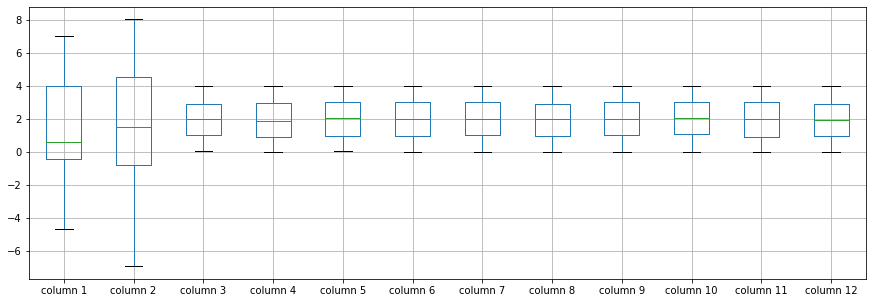

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1     1.494118
column 2     1.291077
column 3     1.974092
column 4     1.928878
column 5     1.996903
column 6     2.000199
column 7     1.983432
column 8     1.991657
column 9     1.974262
column 10    1.998405
column 11    1.961146
column 12    1.947068
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.427251,-0.016373,-0.012030,0.031666,0.033901,0.006291,0.019066,0.007977,-0.009702,0.011267,0.029200
column 2,-0.427251,1.000000,-0.000983,-0.026182,-0.044715,-0.007679,0.042038,-0.012227,0.002126,-0.037034,-0.067543,0.008995
column 3,-0.016373,-0.000983,1.000000,-0.037492,0.094415,0.001044,0.035855,-0.001525,-0.003938,-0.012401,-0.038089,0.039727
column 4,-0.012030,-0.026182,-0.037492,1.000000,-0.004731,-0.036263,0.012734,0.032249,-0.029262,0.044814,0.036357,-0.012898
column 5,0.031666,-0.044715,0.094415,-0.004731,1.000000,0.062017,0.020370,0.002957,-0.032164,-0.020208,0.031360,0.011355
column 6,0.033901,-0.007679,0.001044,-0.036263,0.062017,1.000000,-0.068360,0.043217,0.015051,0.002000,-0.057154,-0.009775
column 7,0.006291,0.042038,0.035855,0.012734,0.020370,-0.068360,1.000000,-0.036457,-0.003290,-0.045814,0.013604,-0.025590
column 8,0.019066,-0.012227,-0.001525,0.032249,0.002957,0.043217,-0.036457,1.000000,-0.070625,-0.051776,-0.011158,-0.057894
column 9,0.007977,0.002126,-0.003938,-0.029262,-0.032164,0.015051,-0.003290,-0.070625,1.000000,0.030369,-0.016086,-0.057614
column 10,-0.009702,-0.037034,-0.012401,0.044814,-0.020208,0.002000,-0.045814,-0.051776,0.030369,1.000000,-0.067266,0.074295


In [29]:
#column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
#df = pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AE_1.xlsx', header=None,names=column_names)


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [12,12+20,12+20+20,12+20+20+20,12+20+20+20+20,12+20+20+20,12+20+20,12+20,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.65940990447998
Epoch: 1 , loss: 26.50905445098877
Epoch: 2 , loss: 26.311801223754884
Epoch: 3 , loss: 25.986141510009766
Epoch: 4 , loss: 25.042277755737306
Epoch: 5 , loss: 22.719540634155273
Epoch: 6 , loss: 21.03202419281006
Epoch: 7 , loss: 20.324112319946288
Epoch: 8 , loss: 19.891141929626464
Epoch: 9 , loss: 19.48178176879883
Epoch: 10 , loss: 19.272177124023436
Epoch: 11 , loss: 19.173773918151856
Epoch: 12 , loss: 19.0419047164917
Epoch: 13 , loss: 18.916914863586427
Epoch: 14 , loss: 18.685855255126953
Epoch: 15 , loss: 18.427099647521974
Epoch: 16 , loss: 18.574364185333252
Epoch: 17 , loss: 18.47593421936035
Epoch: 18 , loss: 18.457007751464843
Epoch: 19 , loss: 18.4790616607666
Epoch: 20 , loss: 18.38208797454834
Epoch: 21 , loss: 18.234097595214845
Epoch: 22 , loss: 18.207610454559326
Epoch: 23 , loss: 18.413725452423094
Epoch: 24 , loss: 18.198393898010252
Epoch: 25 , loss: 18.101591

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
796,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
797,0.0,3.356023,0.0,0.0,-1.621343,0.194017,0.507433,0.0,0.0,0.402805,0.0,0.127124
798,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(56.07863920066708, 248.22200824735242)

In [18]:
NRMS=numerator/denominator
NRMS


0.2259213016469712

In [19]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.53370,0.469590,0.679080,3.434400,2.79240,2.77630,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.92160,0.424720,1.178500,1.680200,1.38880,3.21670,2.923600,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.06500,1.567600,1.482400,0.921600,2.64240,1.51870,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.95630,2.787000,2.595700,2.893300,1.53750,0.99942,3.659300,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.63120,3.554100,2.271100,0.374250,2.17860,1.31400,1.063200,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.55612,0.070769,2.074700,0.803040,3.22290,3.49330,1.325500,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.34610,1.377300,2.288700,0.396130,2.39610,2.46350,1.667500,2.461700,1.226700
797,3.344800,0.971723,2.031000,2.26460,1.719857,1.731017,1.733033,0.74027,2.49540,1.746105,1.622500,1.712424
798,3.441400,-5.216300,1.577000,1.84400,1.098700,3.424300,0.810810,3.72700,1.18790,0.951120,1.884500,1.143700


In [22]:
imputations[-1].to_excel("4-gauss_AG_10(imp).xlsx", index=False, header=False)